# EDA Question 3: Is the Infrastructure Damage Normally Distributed or Heavily Skewed by Disasters




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

# 1. Load your data
df = pd.read_csv('../../data/merged/cleaned_typhoon_impacts.csv') 
df.head()

,Cyclone Name,Region,Deaths,Injuries,Affected,Houses destroyed,Houses damaged,Total Houses,Damage to Infrastructure (PhP),Damage to Agriculture + Fisheries (PhP),Year,Category
0,Amang,Region XIII,0,0,10344,0,0,0,0.0,0.0,2019,Tropical Depression
1,Amang,Region XIII,0,0,3458,0,0,0,0.0,0.0,2019,Tropical Depression
2,Amang,Region XIII,0,0,1442,0,0,0,0.0,0.0,2019,Tropical Depression
3,Amang,Region XIII,0,0,853,0,0,0,0.0,0.0,2019,Tropical Depression
4,Amang,Region XIII,0,0,477,0,0,0,0.0,0.0,2019,Tropical Depression


Skewness: 12.10
Kurtosis: 186.90


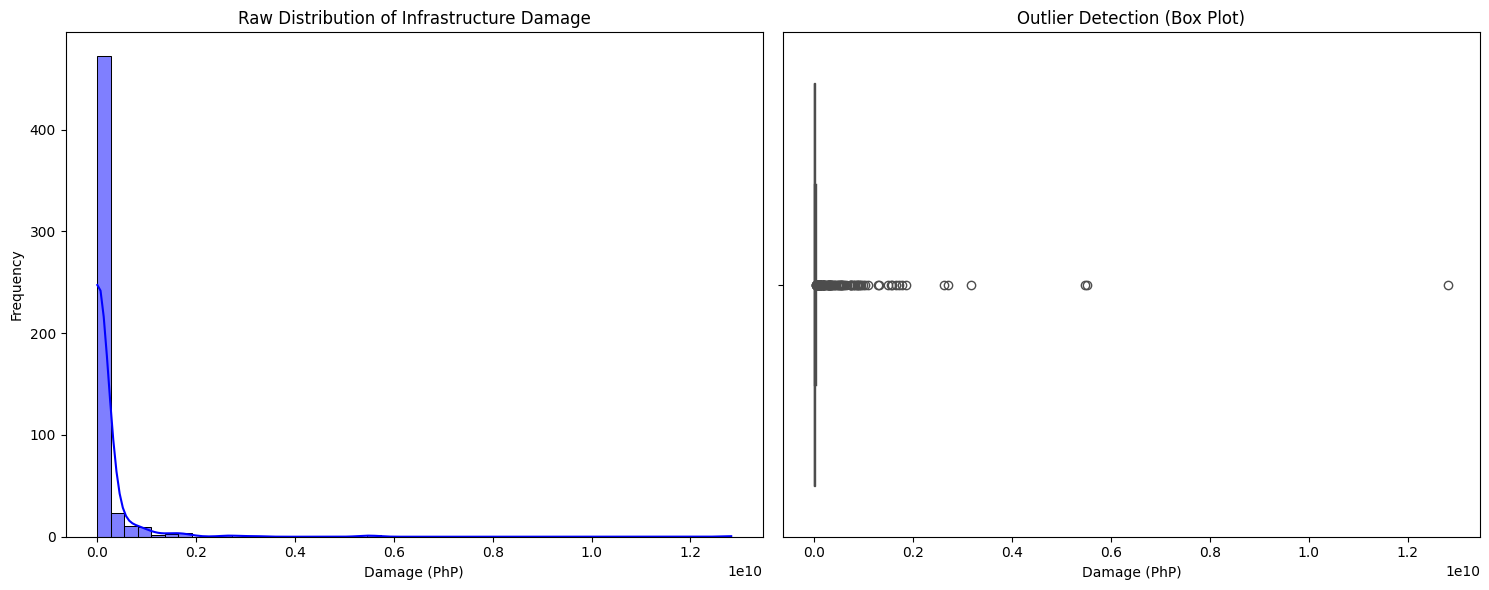

In [5]:
# Clean the damage column: ensure it's numeric and fill NaNs with 0
damage_col = 'Damage to Infrastructure (PhP)' # Replace with your actual column name
df[damage_col] = pd.to_numeric(df[damage_col], errors='coerce').fillna(0)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot A: Raw Distribution (Histogram + KDE)
sns.histplot(df[damage_col], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Raw Distribution of Infrastructure Damage')
axes[0].set_xlabel('Damage (PhP)')
axes[0].set_ylabel('Frequency')

# Plot B: Outlier Detection Box Plot
sns.boxplot(x=df[damage_col], ax=axes[1], color='red')
axes[1].set_title('Outlier Detection (Box Plot)')
axes[1].set_xlabel('Damage (PhP)')

plt.tight_layout()
plt.savefig('../../data/eda-outputs/infra_damage_distribution.png')

# Statistical Check
data_skew = skew(df[damage_col])
data_kurt = kurtosis(df[damage_col])

print(f"Skewness: {data_skew:.2f}")
print(f"Kurtosis: {data_kurt:.2f}")

In [4]:
df[df["Damage to Infrastructure (PhP)"] > 10000000000].head()

,Cyclone Name,Region,Deaths,Injuries,Affected,Houses destroyed,Houses damaged,Total Houses,Damage to Infrastructure (PhP),Damage to Agriculture + Fisheries (PhP),Year,Category
275,Odette,CARAGA,71,0,106562,241,9928,10169,1.282397e+10,742395847.0,2021,Super Typhoon


# Interpretation & Insights:
The distribution of infrastructure damage is non-normal and leptokurtic (Kurtosis: 186.90). The vast majority of events resulted in minimal fiscal impact, while outliers like Typhoon Odette (2021) created "spikes" in the data that are several orders of magnitude higher than the median.

# Conclusion:
Because the skewness is 12.10, a standard linear regression will fail to predict damage accurately. We may apply a Log-10 Transformation to the PhP values to stabilize the variance as it will pull the "Odette-level" outliers closer to the rest of the data, allowing the model to see patterns that are currently hidden by the extreme scale.